# Model and entropy

Models capture the nature of some data as simply as possible. The basic structure of a statistical model considers data as the sum of a model and some errors.  
 
$\widehat{𝑑𝑎𝑡𝑎} = 𝑚𝑜𝑑𝑒𝑙 + 𝑒𝑟𝑟𝑜𝑟$

The model expresses the values we expect the data to be take given our knowledge.   The error reflects the differences between the model’s prediction and the observed data.  



In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import random
from sklearn.metrics import confusion_matrix
 

# Logistic regression and errors

[Logistic regression explained](https://realpython.com/logistic-regression-python/)

Please ignore all the Python code used to complete the example model. 

## Some simulated data

In [14]:
x = np.arange(20).reshape(-1, 1)
x


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

Ground truth - y:

In [15]:
y = []
for i in range(0, 20):
    y = np.append(y, random.randint(0, 1))

y

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1.])

## The model fitting

In [16]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x, y)


LogisticRegression(random_state=42, solver='liblinear')

Model classes:

In [17]:
model.classes_

array([0., 1.])

Model.intercepts:

In [18]:
model.intercept_


array([-0.06531064])

Model coefficients:

In [19]:
model.coef_

array([[0.00825072]])

## Evaluation of the model

In [20]:
probs = model.predict_proba(x)
probs

array([[0.51632186, 0.48367814],
       [0.51426111, 0.48573889],
       [0.51219988, 0.48780012],
       [0.51013823, 0.48986177],
       [0.50807624, 0.49192376],
       [0.50601397, 0.49398603],
       [0.5039515 , 0.4960485 ],
       [0.5018889 , 0.4981111 ],
       [0.49982622, 0.50017378],
       [0.49776356, 0.50223644],
       [0.49570097, 0.50429903],
       [0.49363853, 0.50636147],
       [0.4915763 , 0.5084237 ],
       [0.48951437, 0.51048563],
       [0.48745278, 0.51254722],
       [0.48539163, 0.51460837],
       [0.48333097, 0.51666903],
       [0.48127088, 0.51872912],
       [0.47921142, 0.52078858],
       [0.47715267, 0.52284733]])

In [21]:
y_pred = model.predict(x)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

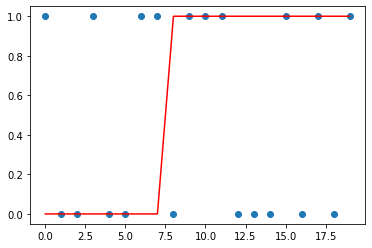

In [22]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# Can we use this model to make some decision?

We know the ground truth - _y_ -, it has been observed when we captured the data. 

We know a predicted outcome - $\widehat{y}$ - we have computed those using a prediction technique; i.e., a form of regression, decision trees, random forrest, Neural-AI, this list is not exhaustive.



## Confusion matrices and metrics

The outcome a model fitting process is evaluated using some metrics that measures the number of errors in the prediction against actual some labels data.  

We our training data set we have a model...


Error:

In [11]:
model.score(x, y)

0.6

With some unseen data.

In [80]:
x_test = np.arange(20) 
y_test = y
x_test[5] = random.randint(0, 20)

x_test = np.sort(x_test)
x_test = x_test.reshape(-1, 1)
x_test

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [81]:
y_test = y
y_test[5] = abs(y[5] -1)

y_test

array([0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1.])

In [82]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

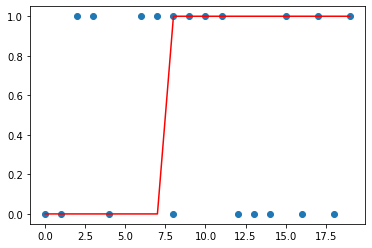

In [83]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, color='red')

In [84]:
print(y_test)
print(y_pred)
sum(abs(y_test - y_pred))

[0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


10.0

### Metrics
For binary classification (True/False) such as logistic regression four possible events can occur. 

- __True positives (TP):__ The number of correct predictions for the true class; i.e., the number of predicted True class that are known to be true. 
- __True negatives (TN):__ The number of correct predictions for the false class; i.e., the number of predicted False class that are known to be False. 
- __False positives (FP):__ The number of erroneous predictions for the True class; i.e., the number of predicted True class that are known to be False. 
- __True negatives (TN):__ The number of erroneous predictions for the False class; i.e., the number of predicted False class that are known to be True. 

### Confusion matrix 
A confusion matrix counts the number True positives, False positives, True negatives, and False negatives.  It represents in a table the actual values against the predicted values of a testing dataset. The correct predictions are shown in green with white font. The errorneous predictions in black and orange background. 

|   |Predicted_0|Predicted_1|
|---|---|---|
|__Actual_0__| False positives|False negatives|
|__Actual_1__| True negatives|True positives|

So in our example below produces this confusion matrix:

In [85]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[3, 6],
       [4, 7]])

### Measures of quality 

The measures of quality for a predictive model are expressed using several performance metric referred as precision, recall, and accuracy. These metrics are probabilities computed using the following mathematical formulae. 
 
Accuracy describes how the model perform across all classes (True and False). It  adds the diagonal values of a confusion matrix and divide by the total of possible outcomes.  
 
$𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦= \frac{TP + TN}{TP + TN + FP + FN}$

 

In [86]:
Accuracy = (cm[1][1] + cm[0][0])/(cm[1][1] + cm[1][0] + cm[0][0] + cm[0][1])
Accuracy

0.5

Precision measures the model’s accuracy in prediction the True class as a sample. It reflects how reliable the model is in classifying samples as positive. It is a probability based on the class columns the confusion matrix (green cells).  The precision can be computed for each class. 

$Precision = \frac{TP}{TP +  FP }$

In [87]:
Precision = (cm[1][1])/(cm[1][1] + cm[0][0])
Precision

0.7

Recall is the probability to detect positive classes. It can be calculated for each class. It is a probability is obtained by dividing the true positive by the sum of the true positive and false negative; i.e., the class row of the confusion matrix.  

$Recall = \frac{TP}{TP + FN}$

In [88]:
Recall = (cm[1][1])/(cm[1][1] + cm[0][1])
Precision

0.7

## Can we use this model for making some accurate predictions?

Your call....

# Probabilities

Let's play Heads or Tails. We represent tails as 0 and heads as 1. We try to find out the probability randomly obtaining Head. We are playing 100 times. 
 

In [89]:
sample = [random.randint(0,1) for x in range(101)] 
no_heads = sum(sample) 
P_head = no_heads/len(sample) 
print("Probability to land a head is : ", P_head) 

Probability to land a head is :  0.5742574257425742


# How could the ground truth help making some accurate predictions?

We know a predicted outcome - $\widehat{y}$ - we have computed those using a prediction technique; i.e., a form of regression, decision trees, random forrest, Neural-AI, this list is not exhaustive.


__Information:__ The level of surprise we may gain from some observations against the ground truth.

__A high level of probability event__ suggests some unsurprising results. We can trust them. 

__A low level of probability event__ suggest some surprising results. We cannot trust them.

So in our previous model we had an accuracy of 

In [90]:
Accuracy

0.5

We estimate the level of surprises, with some examples rules.

In [91]:
if Accuracy > 0.90:
    print("High probability event  -  not much surprises - can trust")
elif Accuracy <= 0.90 and Accuracy > 0.70:
    print("re probability event  -  some surprises - can somehow trust")
elif Accuracy <= 0.70 and Accuracy > 0.50:
    print("A lower probability event  -  can expect surprises - may not trust")
elif Accuracy <= 0.50 and Accuracy > 0.30:
    print("An even lower probability event  -  can expect surprises - should not trust")
elif Accuracy <= 0.30:
    print("Low probability event  -  expect many surprises - will not trust")

An even lower probability event  -  can expect surprises - should not trust


Let's express it mathematically:

 $info(x) = - log p(x)$
 
 
So for the __predicted values as a whole__ to illustrate the level of trust. 

In [92]:
info = -1 * math.log(Accuracy,2)
info

1.0

An indication of the difference between the ground truth and the predicted outcomes is the entropy. For your interest, the entropy is 
$Entropy = − \sum 𝑃_𝑖 log_2(𝑃_𝑖)$




We continue with our exploration by finding the level of surprises for each predicted values.... 



In [93]:
prob_pred = model.predict_proba(x_test)
probs = [prob_pred[i][1] for i in range(0,len(prob_pred))]

infos = [- math.log(p) for p in probs] 

print("Labels - ", "probability - "," Level of surprise") 
[info for info in zip(y_test,probs,infos)] 

Labels -  probability -   Level of surprise


[(0.0, 0.48367814168676493, 0.7263355899887102),
 (0.0, 0.48573888886922445, 0.7220840651617599),
 (1.0, 0.48780012105915865, 0.7178495450265909),
 (1.0, 0.48986176824651956, 0.713632033296088),
 (0.0, 0.49192376036481, 0.7094315331052642),
 (1.0, 0.49604849890306685, 0.7010815769908609),
 (1.0, 0.4981111049935188, 0.6969321244444987),
 (1.0, 0.5001737753749635, 0.69279969019179),
 (0.0, 0.5001737753749635, 0.69279969019179),
 (1.0, 0.5022364398416542, 0.6886842744735606),
 (1.0, 0.5042990281886491, 0.6845858769513853),
 (1.0, 0.5063614702213698, 0.6805044967076335),
 (0.0, 0.5084236957651549, 0.6764401322455951),
 (0.0, 0.5104856346748099, 0.6723927814896832),
 (0.0, 0.512547216844147, 0.6683624417857172),
 (1.0, 0.5146083722155139, 0.6643491099012843),
 (0.0, 0.51666903078931, 0.6603527820261778),
 (1.0, 0.5187291226334833, 0.6563734537729173),
 (0.0, 0.5207885778930099, 0.6524111201773434),
 (1.0, 0.5228473267993508, 0.6484657756992931)]

## Let's recap

Models capture the nature of some data as simply as possible. The basic structure of a statistical model considers data as the sum of a model and some errors.  
 
$\widehat{𝑑𝑎𝑡𝑎} = 𝑚𝑜𝑑𝑒𝑙 + 𝑒𝑟𝑟𝑜𝑟$

The model expresses the values we expect the data to be take given our knowledge.   The error reflects the differences between the model’s prediction and the observed data.  

If we have a model based on some known outcomes (i.e., labels), we can compute the probability of correct occurrences against these labels.  


For example, we obtain some predicted data and compare against the labels. We can then find the ratio of correct predictions; i.e., correct prediction/number of predictions (Accuracy). We did that earlier. 



## Cross entropy

The cross-entropy measures __the distance from the truth and a model__.



$H(p,q) = - \sum p(x) log_2 (q(x))$


- _p(x)_ represents the true distribution (i.e, the ground truth) 
- _q(x_) represents the predicted data from a model (i.e., probabilities) 
 
 
__our ground truth:__ p(x) is substituted with y_test

__our probabilities :__ q(x) is substituted with probabilities (probs) 

In [94]:
i_s = range(0,len(probs)-1)
# p(x) log_2 (q(x))
log_prob = [y_test[i] * math.log(probs[i],2) for i in i_s]
# sum 
sum_log_prob = np.sum(log_prob)

# Apply -
cross_entropy = -1 * sum_log_prob


__A large cross-entropy__ indicates the models is not appropriate; it predicts many erroneous outcomes. 

__A small cross-entropy__ indicates the reverse; the model can potentially predict many correct outcomes. 
 

In [95]:
cross_entropy

9.949967878662035

# A simulated low cross-entropy

Such cross-entropy would suggest this model is suitable to make some decision. The differences between the predicted values and ground truth is really close. 

In [96]:
import math 
ground_truth = [1,0,0,1,0,1,0,1] 
prob = [0.9, 0.1, 0.2, 0.8,0.1,0.8, 1.0, 1.0] 
print("compute product of log_2 of q(x) * p(x):") 
log_prob = [ground_truth[i] * math.log(prob[i],2) for i in range(0,len(prob)-1)] 
print("log probabilities : " ,log_prob) 
print("compute sum of log probabilities:") 
sum_log_prob = np.sum(log_prob) 
print("sum of log probabilities : ", sum_log_prob) 
cross_entropy = -1 * sum_log_prob 
print("cross entropy :", cross_entropy) 
 

compute product of log_2 of q(x) * p(x):
log probabilities :  [-0.15200309344504997, -0.0, -0.0, -0.3219280948873623, -0.0, -0.3219280948873623, 0.0]
compute sum of log probabilities:
sum of log probabilities :  -0.7958592832197746
cross entropy : 0.7958592832197746


# A simulated high cross-entropy

Such cross-entropy would suggest this model is __not__ suitable to make some decision. The differences between the predicted values and ground truth is high. 

In [104]:
import math 
ground_truth = [1,0,0,1,0,1,0,1] 
prob = [0.01, 0.09, 0.06, 0.06,0.01,0.02, 0.08, 0.03] 
print("compute product of log_2 of q(x) * p(x):") 
log_prob = [ground_truth[i] * math.log(prob[i],2) for i in range(0,len(prob)-1)] 
print("log probabilities : " ,log_prob) 
print("compute sum of log probabilities:") 
sum_log_prob = np.sum(log_prob) 
print("sum of log probabilities : ", sum_log_prob) 
cross_entropy = -1 * sum_log_prob 
print("cross entropy :", cross_entropy) 
 

compute product of log_2 of q(x) * p(x):
log probabilities :  [-6.643856189774724, -0.0, -0.0, -4.058893689053568, -0.0, -5.643856189774724, -0.0]
compute sum of log probabilities:
sum of log probabilities :  -16.346606068603016
cross entropy : 16.346606068603016
